In [31]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
# load dataset

train_dir = r'C:\Users\harekrushna\Documents\internship\MIDAS TASKS\MIDAS TASK 2\Part 3\mnistTask'

### Data Preprocessing

. Read the picture files.

.Decode the JPEG content to RGB grids of pixels.

.Convert these into floating point tensors

.Rescale the pixel values (b/w 0 and 255) to the [0, 1] intervals

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Link : https://keras.io/preprocessing/image/

In [35]:
# Generating batches of tensor image data

train_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size = (28, 28),
        batch_size = 20,
        class_mode = 'sparse')

Found 60000 images belonging to 10 classes.


In [36]:
# Create the structure of CNN model

In [37]:
from tensorflow.keras import layers
from tensorflow.keras import models

### Using Part 2 model

In [38]:
# Loading the model in part 2

In [39]:
model = keras.models.load_model("C:\\Users\\harekrushna\\Documents\\internship\\MIDAS TASKS\\MIDAS TASK 2\\Part 2\\part2.h5")

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [41]:
# load mnist dataset

mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

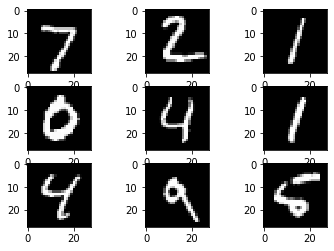

In [42]:
# plot first few mnist test images

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_test[i], cmap=plt.get_cmap('gray'))
plt.show()

In [43]:
# Data reshape

x_test = x_test.reshape((10000, 28, 28, 1))

In [44]:
# Data Normalization

x_test_n = x_test / 255.

In [45]:
# Next step is to compile the model

In [46]:
from tensorflow.keras import optimizers

model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = optimizers.RMSprop(lr=1e-4),
             metrics = ['acc'])

### Evaluating the model

In [47]:
ev = model.evaluate(x_test_n, y_test)

10000/10000 [==============================] - 7s 651us/sample - loss: 0.0657 - acc: 0.9863


In [48]:
ev

[0.06569528349398787, 0.9863]

We are getting an accuracy of around 98.63% with the part2 model.

In [49]:
from tensorflow.keras import backend as k
k.clear_session()
del model

--------------

### Using Part 1 Model

In [66]:
# Loading the model in part 2

In [67]:
model = keras.models.load_model("C:\\Users\\harekrushna\\Documents\\internship\\MIDAS TASKS\\MIDAS TASK 2\\Part 1\\part1.h5")

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [69]:
# Next step is to compile the model

In [70]:
from tensorflow.keras import optimizers

model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = optimizers.RMSprop(lr=1e-4),
             metrics = ['acc'])

In [71]:
ev = model.evaluate(x_test_n, y_test)

10000/10000 [==============================] - 6s 613us/sample - loss: 2.3018 - acc: 0.1008s - loss: 2.3018 - acc: 0.100


In [72]:
ev

[2.301796018600464, 0.1008]

We are getting an accuracy of around 10.08% with the part1 model.

In [73]:
from tensorflow.keras import backend as k
k.clear_session()
del model